Import Libraries required. Since we are building linear regression from scratch, we will be using numpy. We will be using scikit-learn to generate dataset required for this tutorial. We will use scikit-learn to compare results for generated dataset.

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from matplotlib import animation

We will generate regression dataset with 100 examples. Since we are limiting ourselves to a simple case, number of
features are onlyone. Initiaise some random state so that generated data is same whenever we generate dataset from
below lines of code.

In [2]:
%matplotlib inline
X, y = make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=15, random_state=2021)

Now let us plot the data generated from above cell.

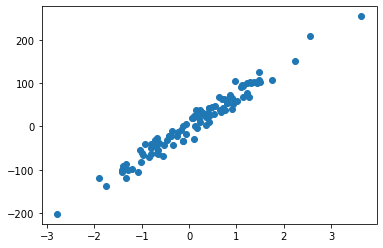

In [3]:
plt.scatter(X, y)

Let us use scikit-learn's linear regression api to find slope and intercept of the line that fits our data well.

[71.79063475] 0.6807397854798136


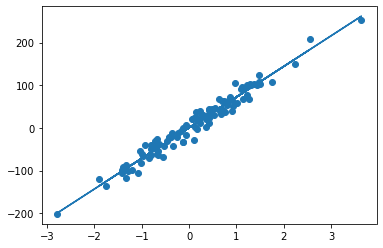

In [4]:
#linear regress using sklearn libs
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

print(lr.coef_, lr.intercept_)

regressed_y = X*lr.coef_ + lr.intercept_
regressed_y = regressed_y.ravel() #flatten the array

plt.plot(X, regressed_y)
plt.scatter(X, y)

One can find gradient descent updates in the following function.

In [5]:
#Gradient descent
def gradient_descent(X,y,alpha,a,b):
    y_pred = X*a + b
    y_diff = (y.reshape(-1,1) - y_pred)
    da = -2*(np.sum(y_diff*X)/X.shape[0])
    db = -2*(np.sum(y_diff)/X.shape[0])
    a = a - alpha*da
    b = b - alpha*db
    return (a,b)

This is the final step where one trains linear regression model with gradient descent algorithm. One can observe
that gradient descent algorithm iteratives approaches the best fit line from scikit-learn as learning progresses.

<IPython.core.display.Javascript object>


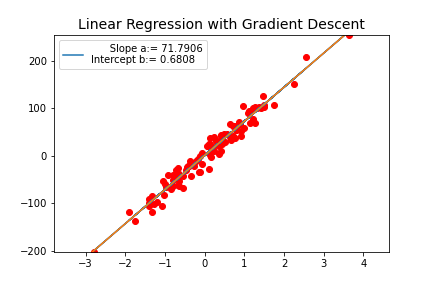

In [6]:
%matplotlib notebook
a = 0     #slope
b = 0     #interscept
alpha = 0.005
iter_num = 1000   # number of iterations

fig, ax = plt.subplots()
plt.scatter(X, y, color='red')
plt.plot(X, regressed_y)
line, = plt.plot([], [])

ax.set_title('Linear Regression with Gradient Descent', fontsize = 14)
x_vals = np.arange(ax.get_xlim()[0],ax.get_xlim()[1],0.01)

def init():
    ax.set_xlim(X.min()-1,X.max()+1)
    ax.set_ylim(y.min()-1,y.max()+1)
    return line,

def animate(i):
    global a,b
    a, b = gradient_descent(X,y,alpha,a,b)
    ax.legend(['      Slope a:= '+ str(round(a,4)) + '\n' +'Intercept b:= ' + str(round(b,4)) ])
    y_vals = x_vals*a + b
    line.set_xdata(x_vals)
    line.set_ydata(y_vals)
    return line,
    
ani = animation.FuncAnimation(fig, func=animate, frames=iter_num, init_func=init, interval=10,blit=True)
fig.show()